In [1]:
# import libraries

import pandas as pd
import seaborn as sns
import numpy as np

from datetime import datetime

import matplotlib
import matplotlib.pyplot as plt

plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjust the configuration of the plots that we create.

In [2]:
# Read csv file and store as dataframe
# Making a list of missing value types
missing_values = ["n/a", "na","<NA>", "--"]

df = pd.read_csv('/Users/zachariah/Desktop/movies dataset/movies.csv', na_values = missing_values)

In [3]:
# look at the data-- first 5 rows
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


### Clean the data

In [4]:
# Total missing values for each feature
print (df.isnull().sum())

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64


In [5]:
# Find if there are any missing values in any of the columns in terms of percentage

for col in df.columns:
    pct_missing = round(np.mean(df[col].isnull()), 3)
    print('{} - {}%'.format(col,pct_missing))

name - 0.0%
rating - 0.01%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.283%
gross - 0.025%
company - 0.002%
runtime - 0.001%


In [6]:
# Data types for all columns in the dataframe

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [7]:
# Get all information regarding the columns in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [8]:
# display the rows of the released column. The column has date and country name in paranthesis.

df['released']

0          June 13, 1980 (United States)
1           July 2, 1980 (United States)
2          June 20, 1980 (United States)
3           July 2, 1980 (United States)
4          July 25, 1980 (United States)
                      ...               
7663    October 23, 2020 (United States)
7664    February 7, 2020 (United States)
7665           April 27, 2020 (Cameroon)
7666     October 1, 2020 (United States)
7667     August 19, 2020 (United States)
Name: released, Length: 7668, dtype: object

In [9]:
# Remove country names from the released column. 

df['new_releasedate'] = df['released'].apply(lambda x: str(x).split(' (')[0])
print(df['new_releasedate'])

0          June 13, 1980
1           July 2, 1980
2          June 20, 1980
3           July 2, 1980
4          July 25, 1980
              ...       
7663    October 23, 2020
7664    February 7, 2020
7665      April 27, 2020
7666     October 1, 2020
7667     August 19, 2020
Name: new_releasedate, Length: 7668, dtype: object


In [10]:
#new_releasedate is converted to datetime. This is done so that the year can be extracted from the new_releasedate column.

df['new_releasedate'] = pd.to_datetime(df['new_releasedate'], infer_datetime_format=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             7668 non-null   object        
 1   rating           7591 non-null   object        
 2   genre            7668 non-null   object        
 3   year             7668 non-null   int64         
 4   released         7666 non-null   object        
 5   score            7665 non-null   float64       
 6   votes            7665 non-null   float64       
 7   director         7668 non-null   object        
 8   writer           7665 non-null   object        
 9   star             7667 non-null   object        
 10  country          7665 non-null   object        
 11  budget           5497 non-null   float64       
 12  gross            7479 non-null   float64       
 13  company          7651 non-null   object        
 14  runtime          7664 non-null   float64

In [11]:
#extract year from new_releasedate

df['release_year'] = df['new_releasedate'].apply(lambda x: x.year)
df['release_year']

0       1980.0
1       1980.0
2       1980.0
3       1980.0
4       1980.0
         ...  
7663    2020.0
7664    2020.0
7665    2020.0
7666    2020.0
7667    2020.0
Name: release_year, Length: 7668, dtype: float64

In [12]:
# look at the datatype of release_year
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             7668 non-null   object        
 1   rating           7591 non-null   object        
 2   genre            7668 non-null   object        
 3   year             7668 non-null   int64         
 4   released         7666 non-null   object        
 5   score            7665 non-null   float64       
 6   votes            7665 non-null   float64       
 7   director         7668 non-null   object        
 8   writer           7665 non-null   object        
 9   star             7667 non-null   object        
 10  country          7665 non-null   object        
 11  budget           5497 non-null   float64       
 12  gross            7479 non-null   float64       
 13  company          7651 non-null   object        
 14  runtime          7664 non-null   float64

In [14]:
# fill missing values
df['release_year'].fillna(df['year'], inplace=True)


In [15]:
# Count the null values in column release_year 
df['release_year'].isna().sum()

0

In [16]:
# Display the null values for every feature(column)
print (df.isnull().sum())

name                  0
rating               77
genre                 0
year                  0
released              2
score                 3
votes                 3
director              0
writer                3
star                  1
country               3
budget             2171
gross               189
company              17
runtime               4
new_releasedate       2
release_year          0
dtype: int64


In [17]:
# replace the NaN values with zeros for a column budget
df['budget'] = df['budget'].fillna(0)

In [18]:
# replace the Nam values with zeros for column gross
df['gross'] = df['gross'].fillna(0)

In [19]:
# replace the Nam values with zeros for column runtime
df['runtime'] = df['runtime'].fillna(0)

In [20]:
# replace the Nam values with zeros for column votes
df['votes'] = df['votes'].fillna(0)

In [21]:
# replace the Nam values with zeros for column score
df['score'] = df['score'].fillna(0)

In [22]:
print (df.isnull().sum())

name                0
rating             77
genre               0
year                0
released            2
score               0
votes               0
director            0
writer              3
star                1
country             3
budget              0
gross               0
company            17
runtime             0
new_releasedate     2
release_year        0
dtype: int64


In [23]:
# change the datatype for columns votes, budget and gross so as to remove the decimal format. 
df['votes'] = df['votes'].astype('int64')
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [24]:
df.dtypes

name                       object
rating                     object
genre                      object
year                        int64
released                   object
score                     float64
votes                       int64
director                   object
writer                     object
star                       object
country                    object
budget                      int64
gross                       int64
company                    object
runtime                   float64
new_releasedate    datetime64[ns]
release_year              float64
dtype: object

In [25]:
# Order the dataframe by gross income

df.sort_values(by = ['gross'], inplace = False, ascending = False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,new_releasedate,release_year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009-12-18,2009.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019-04-26,2019.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997-12-19,1997.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015-12-18,2015.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018-04-27,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,Mortal Passions,R,Crime,1989,"January 26, 1990 (United States)",4.5,274,Andrew Lane,Alan Moskowitz,Zach Galligan,United States,0,0,Gibraltar Entertainment,92.0,1990-01-26,1990.0
1614,Edge of Sanity,R,Horror,1989,"April 14, 1989 (United States)",5.2,1300,Gérard Kikoïne,J.P. Félix,Anthony Perkins,United Kingdom,0,0,Allied Vision,85.0,1989-04-14,1989.0
1606,"I, Madman",R,Fantasy,1989,"April 7, 1989 (United States)",6.0,2900,Tibor Takács,David Chaskin,Jenny Wright,Canada,0,0,Trans World Entertainment (TWE),89.0,1989-04-07,1989.0
1601,My Twentieth Century,NaN,Comedy,1989,"January 13, 1990 (Japan)",7.1,1500,Ildikó Enyedi,Ildikó Enyedi,Dorota Segda,Hungary,0,0,Budapest Stúdió Vállalat,104.0,1990-01-13,1990.0


In [26]:
# To display all the rows in the output

pd.set_option('display.max_rows', None)

In [27]:
# Now lets look at the output 
df = df.sort_values(by = ['gross'], inplace = False, ascending = False)

In [28]:
# Show what values are distinct for column name

df['company'].drop_duplicates().sort_values(ascending = False)

7129                                              thefyzz
5664                                          micro_scope
6412                             iDeal Partners Film Fund
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
524                             Zupnik-Curtis Enterprises
3330                          Zucker Brothers Productions
520                                      Zoetrope Studios
2213                                   Zeta Entertainment
6222                        Zentropa International Norway
3698                              Zentropa Entertainments
1175                                 Zenith Entertainment
5180                                      Zazen Produções
3193                                          ZapPictures
1321                             Zanuck/Brown Productions
1329          

In [29]:
# show what is correlated to the gross revenue
# Hypothesis:
# 1.  Budget will high correlation with gross
# 2. Company will have high correlation with gross
# test this out


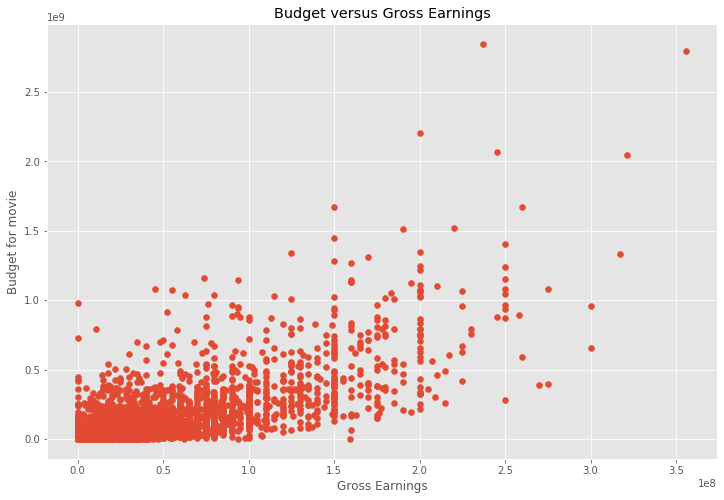

In [30]:
# build a scatterplot with Budget versus gross revenue

plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget versus Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for movie')
plt.show()

In [31]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,new_releasedate,release_year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009-12-18,2009.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019-04-26,2019.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997-12-19,1997.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015-12-18,2015.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018-04-27,2018.0


In [32]:
df.dtypes

name                       object
rating                     object
genre                      object
year                        int64
released                   object
score                     float64
votes                       int64
director                   object
writer                     object
star                       object
country                    object
budget                      int64
gross                       int64
company                    object
runtime                   float64
new_releasedate    datetime64[ns]
release_year              float64
dtype: object

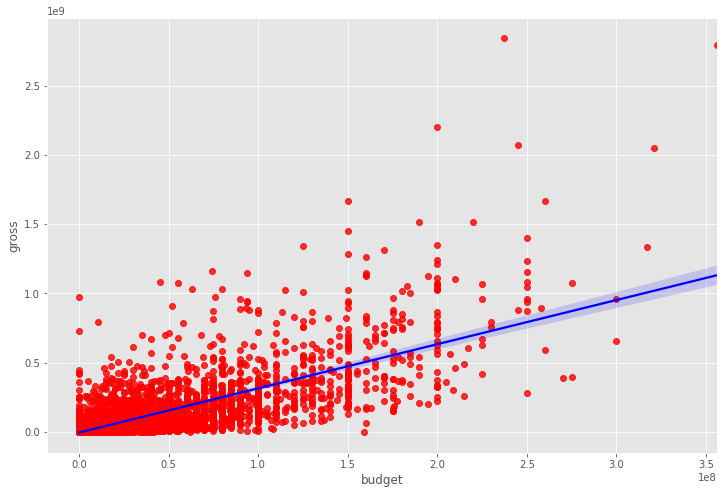

In [33]:
# determine if gross and budget are correlated
# we use seaborn to make regplots
# Plot budget versus gross using seaborn



sns.regplot(x='budget',y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color": "blue"})

In [34]:
# correlation -- only working on numerical fields
df.corr()

,year,score,votes,budget,gross,runtime,release_year
year,1.000000,0.092616,0.222427,0.309212,0.261900,0.116358,0.997416
score,0.092616,1.000000,0.407101,0.056863,0.186012,0.394564,0.100427
votes,0.222427,0.407101,1.000000,0.486931,0.632870,0.306984,0.217915
budget,0.309212,0.056863,0.486931,1.000000,0.750157,0.268372,0.299876
gross,0.261900,0.186012,0.632870,0.750157,1.000000,0.244339,0.254893
runtime,0.116358,0.394564,0.306984,0.268372,0.244339,1.000000,0.116247
release_year,0.997416,0.100427,0.217915,0.299876,0.254893,0.116247,1.000000


In [35]:
# different types of correlation.
# default is Pearson, and we have Kendall and spearman

In [36]:
df.corr(method = 'pearson')

,year,score,votes,budget,gross,runtime,release_year
year,1.000000,0.092616,0.222427,0.309212,0.261900,0.116358,0.997416
score,0.092616,1.000000,0.407101,0.056863,0.186012,0.394564,0.100427
votes,0.222427,0.407101,1.000000,0.486931,0.632870,0.306984,0.217915
budget,0.309212,0.056863,0.486931,1.000000,0.750157,0.268372,0.299876
gross,0.261900,0.186012,0.632870,0.750157,1.000000,0.244339,0.254893
runtime,0.116358,0.394564,0.306984,0.268372,0.244339,1.000000,0.116247
release_year,0.997416,0.100427,0.217915,0.299876,0.254893,0.116247,1.000000


In [37]:
df.corr(method = 'kendall')

,year,score,votes,budget,gross,runtime,release_year
year,1.000000,0.066796,0.330410,0.209304,0.216595,0.096390,0.987644
score,0.066796,1.000000,0.300673,-0.004843,0.091331,0.283601,0.072422
votes,0.330410,0.300673,1.000000,0.439883,0.560449,0.197697,0.324798
budget,0.209304,-0.004843,0.439883,1.000000,0.541956,0.176184,0.200051
gross,0.216595,0.091331,0.560449,0.541956,1.000000,0.177429,0.206180
runtime,0.096390,0.283601,0.197697,0.176184,0.177429,1.000000,0.096215
release_year,0.987644,0.072422,0.324798,0.200051,0.206180,0.096215,1.000000


In [38]:
df.corr(method = 'spearman')

,year,score,votes,budget,gross,runtime,release_year
year,1.000000,0.097757,0.468107,0.291152,0.314681,0.141805,0.997407
score,0.097757,1.000000,0.428810,-0.007002,0.133564,0.399868,0.106073
votes,0.468107,0.428810,1.000000,0.604693,0.752550,0.289359,0.461099
budget,0.291152,-0.007002,0.604693,1.000000,0.716816,0.246941,0.278281
gross,0.314681,0.133564,0.752550,0.716816,1.000000,0.257478,0.299884
runtime,0.141805,0.399868,0.289359,0.246941,0.257478,1.000000,0.141758
release_year,0.997407,0.106073,0.461099,0.278281,0.299884,0.141758,1.000000


In [39]:
# The values differ a little bit for all three methods. We will use the default pearson method for correlation

In [40]:
df.corr()

,year,score,votes,budget,gross,runtime,release_year
year,1.000000,0.092616,0.222427,0.309212,0.261900,0.116358,0.997416
score,0.092616,1.000000,0.407101,0.056863,0.186012,0.394564,0.100427
votes,0.222427,0.407101,1.000000,0.486931,0.632870,0.306984,0.217915
budget,0.309212,0.056863,0.486931,1.000000,0.750157,0.268372,0.299876
gross,0.261900,0.186012,0.632870,0.750157,1.000000,0.244339,0.254893
runtime,0.116358,0.394564,0.306984,0.268372,0.244339,1.000000,0.116247
release_year,0.997416,0.100427,0.217915,0.299876,0.254893,0.116247,1.000000


In [41]:
# we see that the correlation is 0.75 for gross and budget, which is positive correlation.
# Also the correlation between gross and votes is moderately high, 0.63

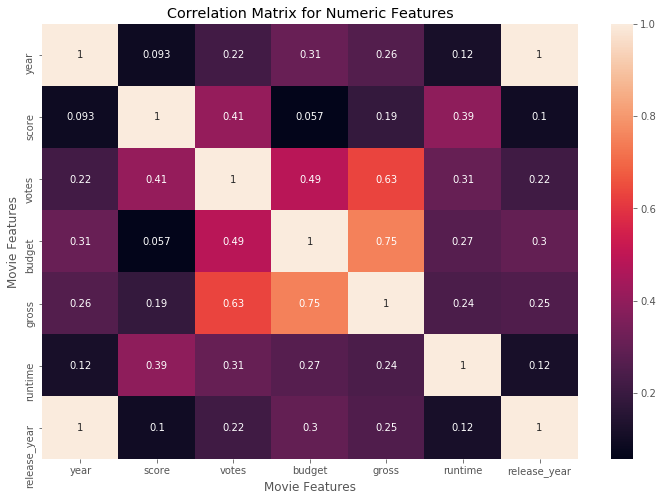

In [42]:
# Create a heat map

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [51]:
# show the correlation between company and gross earnings
# company is not numeric.. so we give it caetogorical values (numeric values)
# we convert all the string field all at the same time using for loop
# change the columns with datatype object to category

df_numerized = df
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]=df_numerized[col_name].astype('category')
        df_numerized[col_name]=df_numerized[col_name].cat.codes # this where random numbers are given to the values in the non numeric columns

df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,new_releasedate,release_year
5445,533,5,0,2009,696,7.8,1100000,1155,1778,2334,55,237000000,2847246203,2253,162.0,2009-12-18,2009.0
7445,535,5,0,2019,183,8.4,903000,162,743,2241,55,356000000,2797501328,1606,181.0,2019-04-26,2019.0
3045,6896,5,6,1997,704,7.8,1100000,1155,1778,1595,55,200000000,2201647264,2253,194.0,1997-12-19,1997.0
6663,5144,5,0,2015,698,7.8,876000,1125,2550,524,55,245000000,2069521700,1540,138.0,2015-12-18,2015.0
7244,536,5,0,2018,192,8.4,897000,162,743,2241,55,321000000,2048359754,1606,149.0,2018-04-27,2018.0


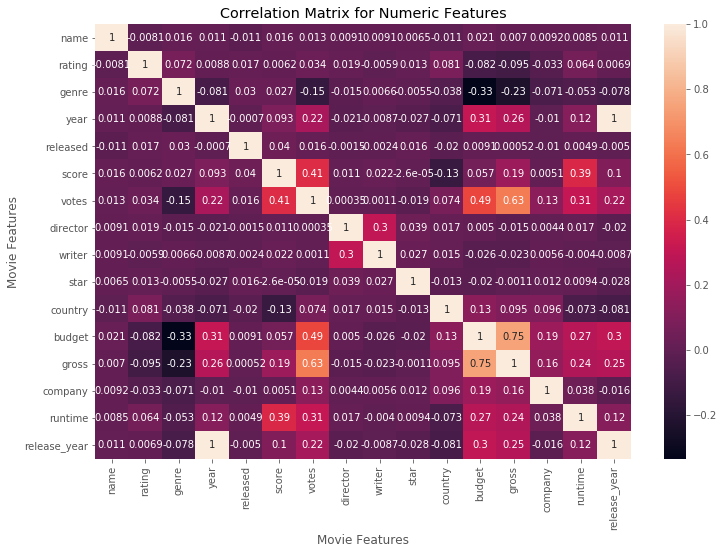

In [44]:
# create a heat map

correlation_matrix = df_numerized.corr()
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [45]:
# This is very single feature, since everything is numeric
# Votes and gross have positive correlation of 0.63


In [46]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_year
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.016377,0.013038,0.009079,0.009081,0.006472,-0.010737,0.020548,0.006989,0.009211,0.008483,0.010900
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,0.006192,0.033743,0.019483,-0.005921,0.013405,0.081244,-0.081939,-0.095450,-0.032943,0.064133,0.006886
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.027384,-0.145296,-0.015258,0.006567,-0.005477,-0.037615,-0.334021,-0.234297,-0.071067,-0.052914,-0.077751
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.092616,0.222427,-0.020795,-0.008656,-0.027242,-0.070938,0.309212,0.261900,-0.010431,0.116358,0.997416
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.039814,0.015878,-0.001478,-0.002404,0.015777,-0.020427,0.009145,0.000519,-0.010474,0.004852,-0.005017
score,0.016377,0.006192,0.027384,0.092616,0.039814,1.000000,0.407101,0.010568,0.022098,-0.000026,-0.133346,0.056863,0.186012,0.005081,0.394564,0.100427
votes,0.013038,0.033743,-0.145296,0.222427,0.015878,0.407101,1.000000,0.000349,0.001127,-0.019146,0.073525,0.486931,0.632870,0.133457,0.306984,0.217915
director,0.009079,0.019483,-0.015258,-0.020795,-0.001478,0.010568,0.000349,1.000000,0.299067,0.039234,0.017490,0.004976,-0.014916,0.004404,0.017062,-0.020432
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002404,0.022098,0.001127,0.299067,1.000000,0.027245,0.015343,-0.025911,-0.022997,0.005646,-0.004036,-0.008701
star,0.006472,0.013405,-0.005477,-0.027242,0.015777,-0.000026,-0.019146,0.039234,0.027245,1.000000,-0.012998,-0.019952,-0.001129,0.012442,0.009418,-0.027594


In [47]:
# organize the above to show highest correlation -- we use unstack

corr_matrix = df_numerized.corr()
correlation_pairs = corr_matrix.unstack()
correlation_pairs


name          name            1.000000
              rating         -0.008069
              genre           0.016355
              year            0.011453
              released       -0.011311
              score           0.016377
              votes           0.013038
              director        0.009079
              writer          0.009081
              star            0.006472
              country        -0.010737
              budget          0.020548
              gross           0.006989
              company         0.009211
              runtime         0.008483
              release_year    0.010900
rating        name           -0.008069
              rating          1.000000
              genre           0.072423
              year            0.008779
              released        0.016613
              score           0.006192
              votes           0.033743
              director        0.019483
              writer         -0.005921
              star       

In [48]:
# we can also sort the correlation pairs
sorted_pairs = correlation_pairs.sort_values()
sorted_pairs

genre         budget         -0.334021
budget        genre          -0.334021
gross         genre          -0.234297
genre         gross          -0.234297
votes         genre          -0.145296
genre         votes          -0.145296
score         country        -0.133346
country       score          -0.133346
rating        gross          -0.095450
gross         rating         -0.095450
rating        budget         -0.081939
budget        rating         -0.081939
country       release_year   -0.081448
release_year  country        -0.081448
year          genre          -0.081261
genre         year           -0.081261
release_year  genre          -0.077751
genre         release_year   -0.077751
runtime       country        -0.073319
country       runtime        -0.073319
genre         company        -0.071067
company       genre          -0.071067
year          country        -0.070938
country       year           -0.070938
genre         runtime        -0.052914
runtime       genre      

In [49]:
# Display the correlation pairs with values greater than 0.5

high_correlation = sorted_pairs[(sorted_pairs > 0.5)]
high_correlation

votes         gross           0.632870
gross         votes           0.632870
budget        gross           0.750157
gross         budget          0.750157
year          release_year    0.997416
release_year  year            0.997416
name          name            1.000000
company       company         1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
star          star            1.000000
writer        writer          1.000000
director      director        1.000000
votes         votes           1.000000
score         score           1.000000
released      released        1.000000
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
release_year  release_year    1.000000
dtype: float64

In [50]:
# Gross and budget have high correlation
# Votes and Gross earning also have moderately high correlation
# Company has no correalation with the gross earnings